In [7]:
!pip install kaggle

from google.colab import files
files.upload()  # Select your kaggle.json file here


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ashutosh12503","key":"5046c0037f46603191e5591d1d628acd"}'}

In [8]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [9]:
!kaggle datasets download -d techsash/waste-classification-data


Dataset URL: https://www.kaggle.com/datasets/techsash/waste-classification-data
License(s): CC-BY-SA-4.0
 92% 393M/427M [00:00<00:00, 486MB/s]
100% 427M/427M [00:00<00:00, 496MB/s]


In [10]:
!unzip waste-classification-data.zip -d waste_classification


Streaming output truncated to the last 5000 lines.
  inflating: waste_classification/dataset/DATASET/TRAIN/R/R_5499.jpg  
  inflating: waste_classification/dataset/DATASET/TRAIN/R/R_55.jpg  
  inflating: waste_classification/dataset/DATASET/TRAIN/R/R_550.jpg  
  inflating: waste_classification/dataset/DATASET/TRAIN/R/R_5500.jpg  
  inflating: waste_classification/dataset/DATASET/TRAIN/R/R_5501.jpg  
  inflating: waste_classification/dataset/DATASET/TRAIN/R/R_5502.jpg  
  inflating: waste_classification/dataset/DATASET/TRAIN/R/R_5503.jpg  
  inflating: waste_classification/dataset/DATASET/TRAIN/R/R_5504.jpg  
  inflating: waste_classification/dataset/DATASET/TRAIN/R/R_5505.jpg  
  inflating: waste_classification/dataset/DATASET/TRAIN/R/R_5506.jpg  
  inflating: waste_classification/dataset/DATASET/TRAIN/R/R_5507.jpg  
  inflating: waste_classification/dataset/DATASET/TRAIN/R/R_5508.jpg  
  inflating: waste_classification/dataset/DATASET/TRAIN/R/R_5509.jpg  
  inflating: waste_classifica

In [11]:
import os
print(os.listdir('/content/waste_classification'))
print(os.listdir('/content/waste_classification/DATASET'))


['dataset', 'DATASET']
['TEST', 'TRAIN']


In [12]:
train_path = '/content/waste_classification/DATASET/TRAIN'
test_path = '/content/waste_classification/DATASET/TEST'


In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_set = train_datagen.flow_from_directory(train_path, target_size=(224,224), batch_size=32, class_mode='binary')
test_set = test_datagen.flow_from_directory(test_path, target_size=(224,224), batch_size=32, class_mode='binary')


Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [14]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
history = model.fit(
    train_set,
    validation_data=test_set,
    epochs=10
)


Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


706/706 ━━━━━━━━━━━━━━━━━━━━ 59s 73ms/step - accuracy: 0.7821 - loss: 0.4982 - val_accuracy: 0.8448 - val_loss: 0.3591
Epoch 2/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 43s 61ms/step - accuracy: 0.8403 - loss: 0.3793 - val_accuracy: 0.8599 - val_loss: 0.3240
Epoch 3/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 43s 60ms/step - accuracy: 0.8715 - loss: 0.3149 - val_accuracy: 0.9117 - val_loss: 0.2412
Epoch 4/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 43s 61ms/step - accuracy: 0.8812 - loss: 0.2904 - val_accuracy: 0.9049 - val_loss: 0.2437
Epoch 5/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 46s 65ms/step - accuracy: 0.9030 - loss: 0.2407 - val_accuracy: 0.8882 - val_loss: 0.3357
Epoch 6/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 43s 61ms/step - accuracy: 0.9276 - loss: 0.1816 - val_accuracy: 0.9164 - val_loss: 0.2490
Epoch 7/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 43s 61ms/step - accuracy: 0.9472 - loss: 0.1363 - val_accuracy: 0.8754 - val_loss: 0.4230
Epoch 8/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 44s 62ms/step - accuracy: 0.9630 - loss: 0.0994 - val_accurac

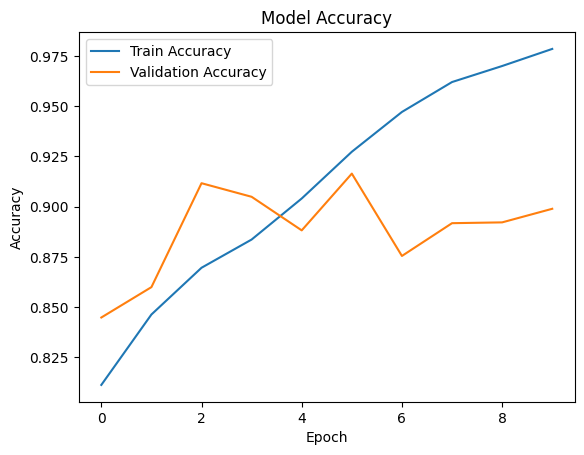

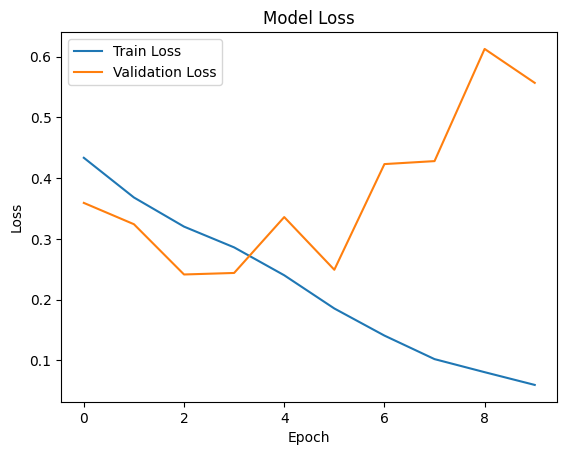

In [17]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [18]:
model.save('/content/waste_classification_cnn.h5')
print("✅ Model saved as waste_classification_cnn.h5")


✅ Model saved as waste_classification_cnn.h5


In [19]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

test_set.reset()
y_pred = model.predict(test_set)
y_pred = np.where(y_pred > 0.5, 1, 0)

print(classification_report(test_set.classes, y_pred, target_names=['Organic', 'Recyclable']))
print(confusion_matrix(test_set.classes, y_pred))


79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step
              precision    recall  f1-score   support

     Organic       0.56      0.59      0.57      1401
  Recyclable       0.44      0.41      0.42      1112

    accuracy                           0.51      2513
   macro avg       0.50      0.50      0.50      2513
weighted avg       0.51      0.51      0.51      2513

[[825 576]
 [658 454]]


In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Data Augmentation (Random transformations to avoid overfitting)
augmented_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

train_aug = augmented_train.flow_from_directory(
    train_path,
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'
)

# Early stopping & learning rate control
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2)

# Retrain model with augmentation
history_aug = model.fit(
    train_aug,
    validation_data=test_set,
    epochs=10,
    callbacks=[early_stop, reduce_lr]
)


Found 22564 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 267s 378ms/step - accuracy: 0.8558 - loss: 0.3893 - val_accuracy: 0.9041 - val_loss: 0.2629 - learning_rate: 0.0010
Epoch 2/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 270s 382ms/step - accuracy: 0.8735 - loss: 0.3144 - val_accuracy: 0.9176 - val_loss: 0.2621 - learning_rate: 0.0010
Epoch 3/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 286s 406ms/step - accuracy: 0.8823 - loss: 0.2979 - val_accuracy: 0.9089 - val_loss: 0.2490 - learning_rate: 0.0010
Epoch 4/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 267s 378ms/step - accuracy: 0.8871 - loss: 0.2857 - val_accuracy: 0.9204 - val_loss: 0.2487 - learning_rate: 0.0010
Epoch 5/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 270s 382ms/step - accuracy: 0.8884 - loss: 0.2842 - val_accuracy: 0.9061 - val_loss: 0.2684 - learning_rate: 0.0010
Epoch 6/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 264s 374ms/step - accuracy: 0.8890 - loss: 0.2757 - val_accuracy: 0.9113 - val_loss: 0.2532 - learning_rate: 0.0010
Epoch 7/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 269s 381ms/step - accura

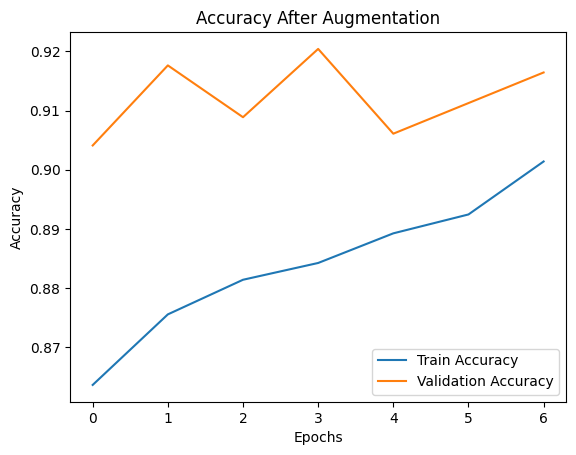

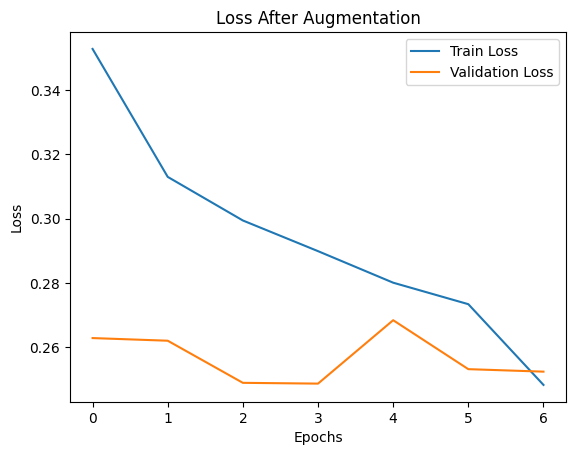

In [21]:
plt.plot(history_aug.history['accuracy'], label='Train Accuracy')
plt.plot(history_aug.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy After Augmentation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history_aug.history['loss'], label='Train Loss')
plt.plot(history_aug.history['val_loss'], label='Validation Loss')
plt.title('Loss After Augmentation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [22]:
model.save('/content/final_waste_management_model.h5')
print("✅ Final improved model saved!")


✅ Final improved model saved!


In [24]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [27]:
from tensorflow.keras.models import load_model

# Load your correct model file
model = load_model('/content/final_waste_management_model.h5')
print("✅ Model loaded successfully!")


✅ Model loaded successfully!


Saving kitchen waste.png to kitchen waste.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 989ms/step


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127820 (\N{BANANA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


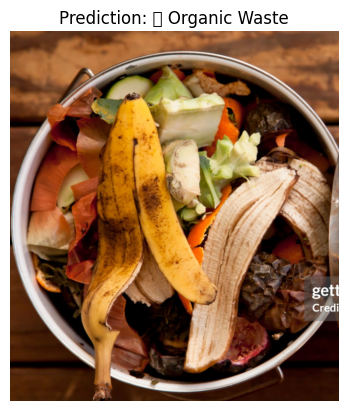

🖼️ Image: kitchen waste.png
✅ Prediction: 🍌 Organic Waste
🔢 Raw Model Output: 0.0005


In [28]:
# Step 2: Uploading image
uploaded = files.upload()

for file_name in uploaded.keys():
    # Step 3: Preprocessing the image
    img = image.load_img(file_name, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0  # normalize

    # Step 4: Make prediction
    prediction = model.predict(img_array)
    label = "♻️ Recyclable Waste" if prediction[0][0] > 0.5 else "🍌 Organic Waste"

    # Step 5: Display result with image
    plt.imshow(image.load_img(file_name))
    plt.title(f"Prediction: {label}")
    plt.axis('off')
    plt.show()

    print(f"🖼️ Image: {file_name}")
    print(f"✅ Prediction: {label}")
    print(f"🔢 Raw Model Output: {prediction[0][0]:.4f}")

Saving plastic bottles.jpg to plastic bottles.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


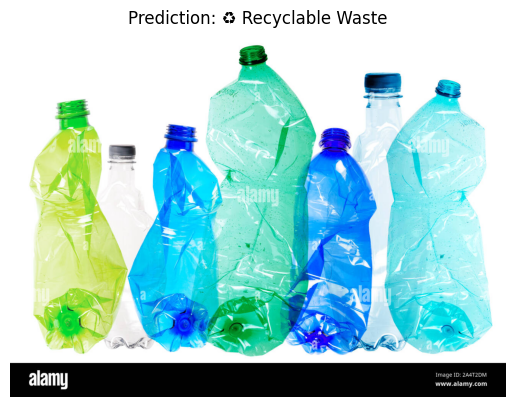

🖼️ Image: plastic bottles.jpg
✅ Prediction: ♻️ Recyclable Waste
🔢 Raw Model Output: 0.9845


In [30]:
# Step 2: Uploading image
uploaded = files.upload()

for file_name in uploaded.keys():
    # Step 3: Preprocessing the image
    img = image.load_img(file_name, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0  # normalize

    # Step 4: Make prediction
    prediction = model.predict(img_array)
    label = "♻️ Recyclable Waste" if prediction[0][0] > 0.5 else "🍌 Organic Waste"

    # Step 5: Display result with image
    plt.imshow(image.load_img(file_name))
    plt.title(f"Prediction: {label}")
    plt.axis('off')
    plt.show()

    print(f"🖼️ Image: {file_name}")
    print(f"✅ Prediction: {label}")
    print(f"🔢 Raw Model Output: {prediction[0][0]:.4f}")